# Colormap reference

FanInSAR provides four well-known colormap categories, including:

- **GMT**: Colormaps from the Generic Mapping Tools (GMT) software package. See [here](https://docs.generic-mapping-tools.org/6.3/cookbook/cpts.html) for more information.
- **SCM**: Colormaps from the Scientific Colour Maps (SCM) package. See [here](https://www.fabiocrameri.ch/colourmaps.php) for more information.
- **colorcet**: A collection of perceptually accurate 256-color colormaps for use with Python plotting programs like Bokeh, Matplotlib, HoloViews, and Datashader. See [here](https://colorcet.holoviz.org/) for more information.
- **cmocean**: Colormaps from the cmocean package which contains colormaps for commonly-used oceanographic variables. See [here](https://matplotlib.org/cmocean/) for more information.

## Useage

In FanInSAR, the colormap can be accessed by attributes of ``faninsar.cmaps`` module. For example, to use the ``earth`` colormap of ``GMT``, you can use the following code:

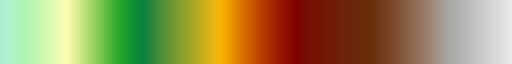

In [25]:
from faninsar import cmaps

cmaps.GMT.earth

Or directly use the colormap name as the attribute of ``cmaps``

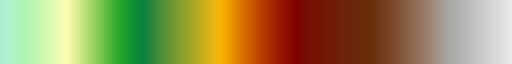

In [26]:
cmaps.earth

Like common colormaps, the colormaps in FanInSAR can be reversed by appending ``_r`` to the name of any built-in colormap. For example, to use the reversed ``earth`` colormap of ``GMT``, you can use the following code:

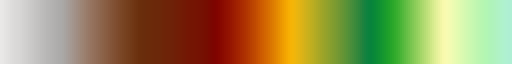

In [27]:
cmaps.earth_r

You can use the colormap in FanInSAR as the same as the colormaps in Matplotlib. For example, to use the ``earth`` colormap of ``GMT`` in Matplotlib, you can use the following code:

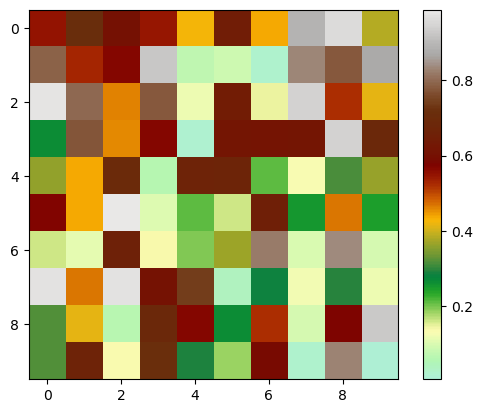

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
arr = np.random.rand(10, 10)
plt.imshow(arr, cmap=cmaps.earth)
plt.colorbar()

## Colormap list
The following table lists all the colormaps available in FanInSAR.

In [33]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=getattr(cmaps, cmap_name))
        ax.text(
            -0.01,
            0.5,
            cmap_name,
            va="center",
            ha="right",
            fontsize=10,
            transform=ax.transAxes,
        )

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

### GMT colormaps

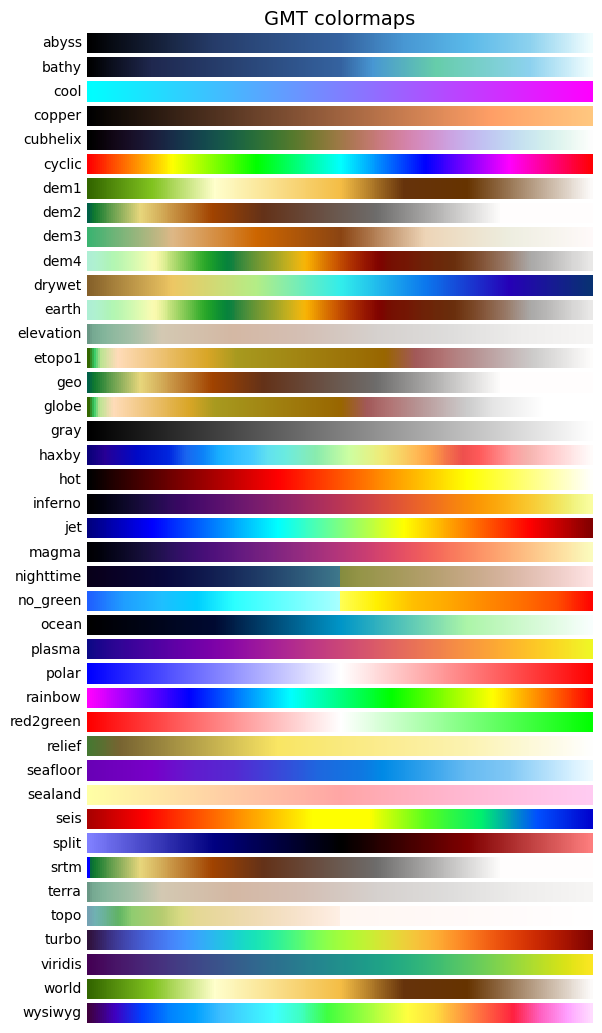

In [17]:
plot_color_gradients("GMT", [i for i in cmaps.GMT.__all__ if not i.endswith("_r")])

### SCM colormaps

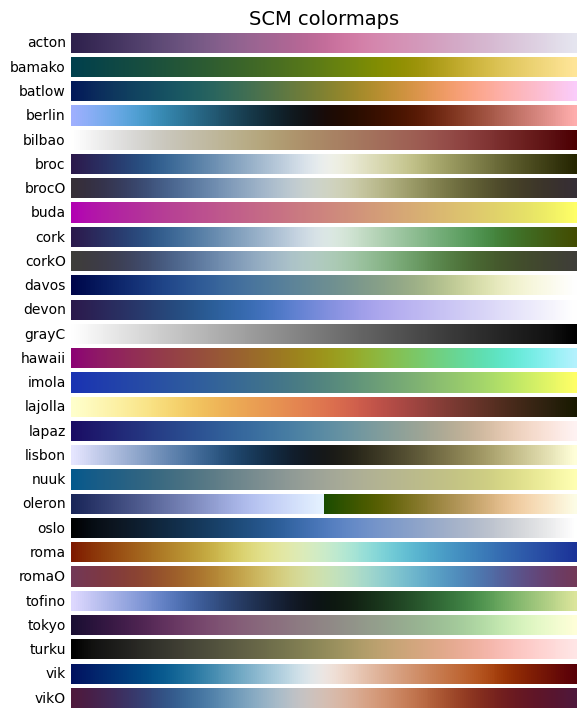

In [18]:
plot_color_gradients("SCM", [i for i in cmaps.SCM.__all__ if not i.endswith("_r")])

### colorcet colormaps

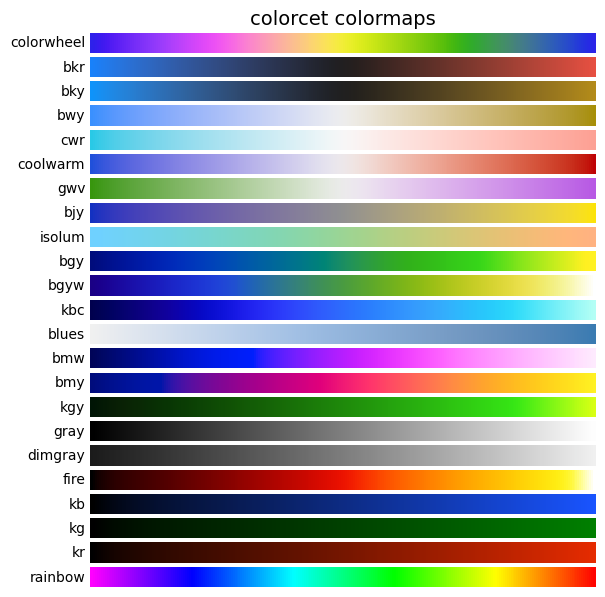

In [19]:
plot_color_gradients(
    "colorcet", [i for i in cmaps.colorcet.__all__ if not i.endswith("_r")]
)

### cmocean colormaps

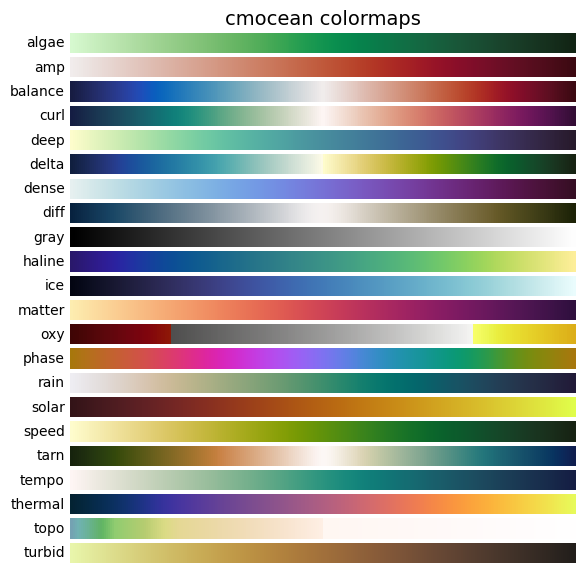

In [20]:
plot_color_gradients(
    "cmocean", [i for i in cmaps.cmocean.__all__ if not i.endswith("_r")]
)